In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_excel("PROJT_BASE_MES_REGRESSAO.xlsx")
# Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head(12)

,Takeoff
Month,
2000-01-01,16152
2000-02-01,16013
2000-03-01,15362
2000-04-01,14292
2000-05-01,14116
2000-06-01,12832
2000-07-01,13086
2000-08-01,13108
2000-09-01,11763


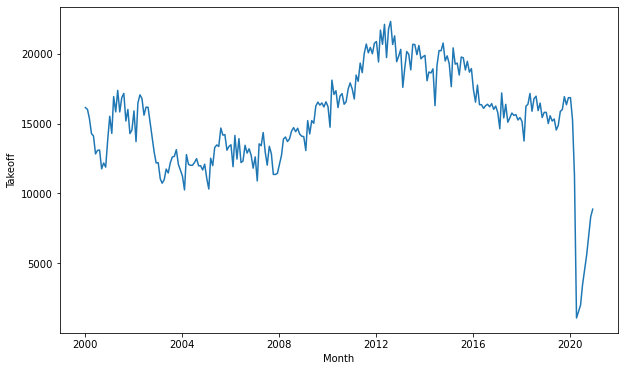

In [4]:
plt.xlabel("Month")
plt.ylabel("Takeoff")
plt.plot(indexedDataset)

In [5]:
#Determing rolling statistics

rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 Takeoff
Month                   
2000-01-01           NaN
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01           NaN
...                  ...
2020-08-01  10185.333333
2020-09-01   9317.500000
2020-10-01   8484.500000
2020-11-01   7816.500000
2020-12-01   7151.583333

[252 rows x 1 columns]                 Takeoff
Month                  
2000-01-01          NaN
2000-02-01          NaN
2000-03-01          NaN
2000-04-01          NaN
2000-05-01          NaN
...                 ...
2020-08-01  6974.497067
2020-09-01  6829.292050
2020-10-01  6413.308443
2020-11-01  5917.535981
2020-12-01  5216.061950

[252 rows x 1 columns]


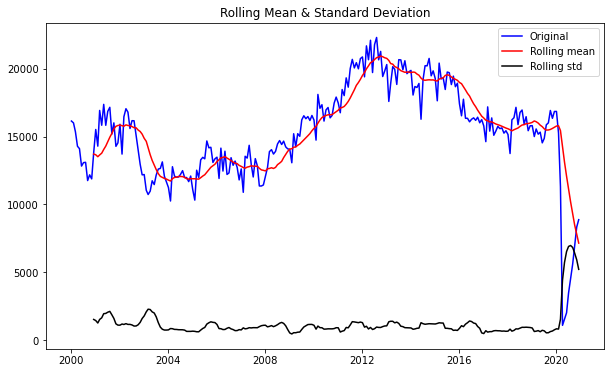

In [6]:
# Plot rolling statistics

orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
# Perform Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Takeoff'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.935900
p-value                          0.775920
#Lags Used                      12.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
dtype: float64
Test Statistic                  -0.935900
p-value                          0.775920
#Lags Used                      12.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
dtype: float64
Test Statistic                  -0.935900
p-value                          0.775920
#Lags Used                      12.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


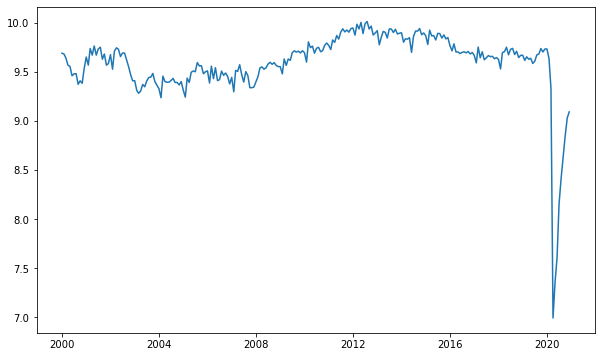

In [8]:
# Estimating trend

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

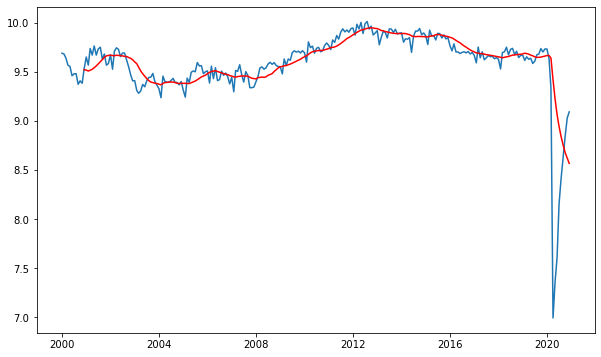

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Non Values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Takeoff
Month,
2000-12-01,0.012325
2001-01-01,0.132919
2001-02-01,0.059962
2001-03-01,0.220837
2001-04-01,0.145598
2001-05-01,0.220972
2001-06-01,0.110467
2001-07-01,0.152100
2001-08-01,0.147320


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Takeoff'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

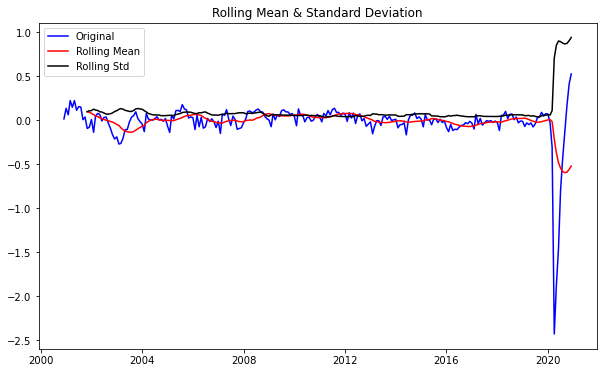

Results of Dickey-Fuller Test:
Test Statistic                 -1.411389
p-value                         0.576804
#Lags Used                     12.000000
Number of Observation Used    228.000000
Critical Value (1%)            -3.459361
Critical Value (5%)            -2.874302
Critical Value (10%)           -2.573571
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

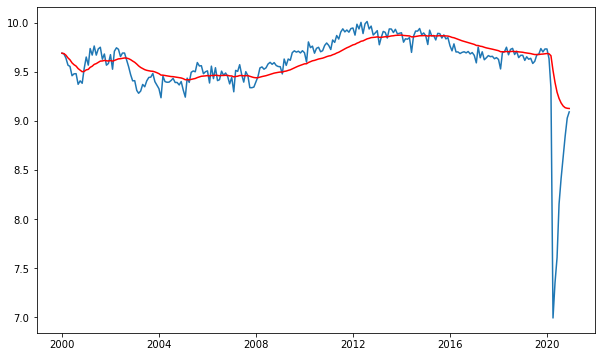

In [13]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

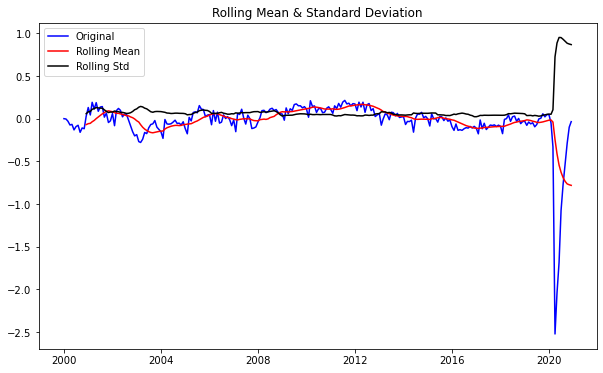

Results of Dickey-Fuller Test:
Test Statistic                 -0.574461
p-value                         0.876649
#Lags Used                     12.000000
Number of Observation Used    239.000000
Critical Value (1%)            -3.458011
Critical Value (5%)            -2.873710
Critical Value (10%)           -2.573256
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

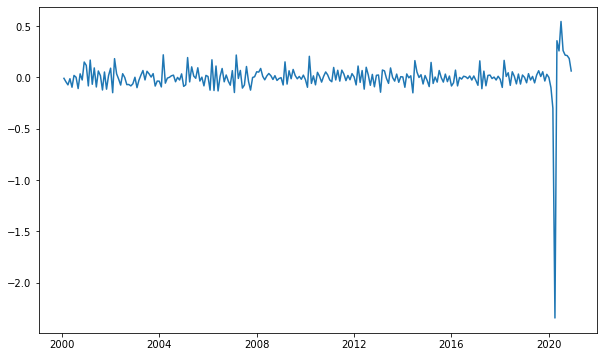

In [15]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

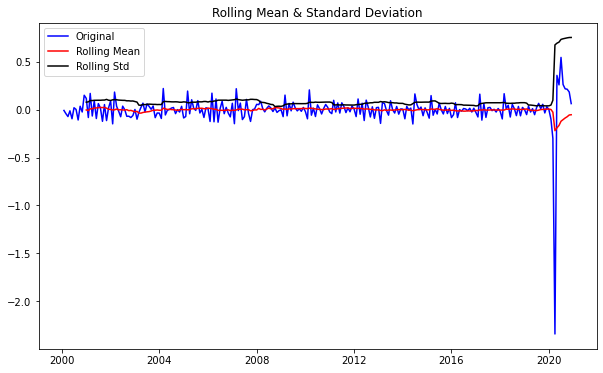

Results of Dickey-Fuller Test:
Test Statistic                 -3.147065
p-value                         0.023261
#Lags Used                     11.000000
Number of Observation Used    239.000000
Critical Value (1%)            -3.458011
Critical Value (5%)            -2.873710
Critical Value (10%)           -2.573256
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

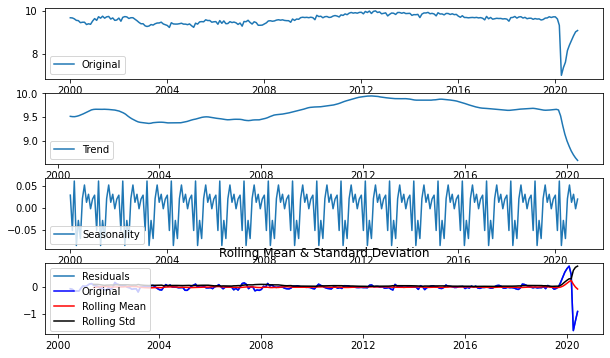

Results of Dickey-Fuller Test:


KeyError: 'Takeoff'

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


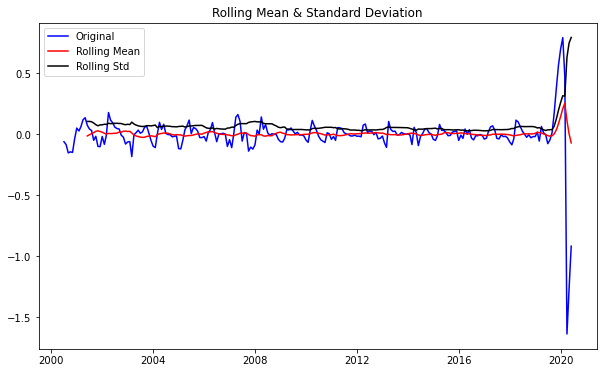

Results of Dickey-Fuller Test:


KeyError: 'Takeoff'

In [18]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


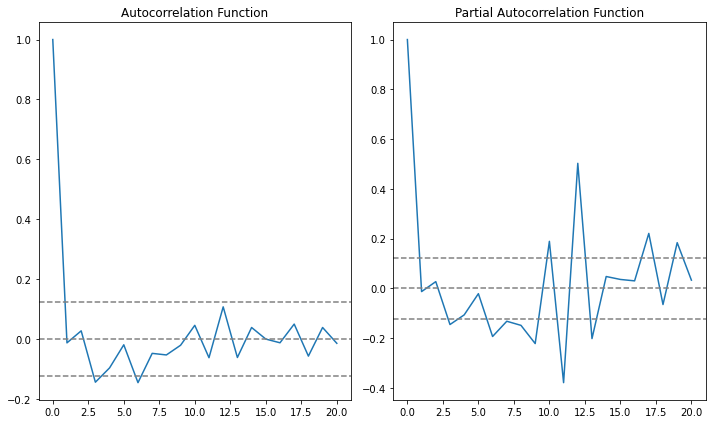

In [19]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

Plotting AR model


/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


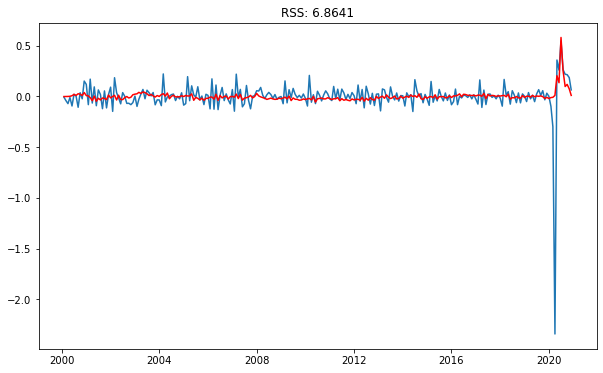

In [20]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

model = ARIMA(indexedDataset_logScale, order=(3, 1, 3))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Takeoff"])**2))
print('Plotting AR model')

/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


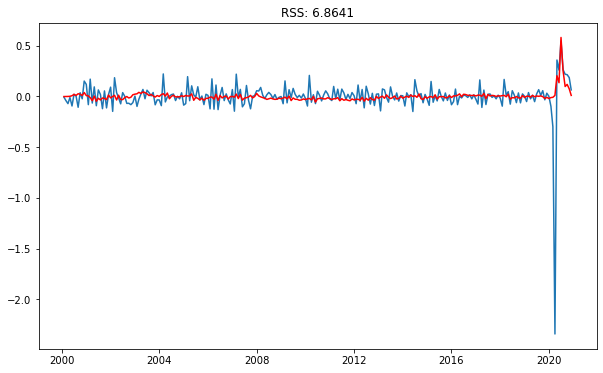

In [21]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(3, 1, 3))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Takeoff"])**2))
print('Plotting MA model')

/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


/Users/tfscruz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


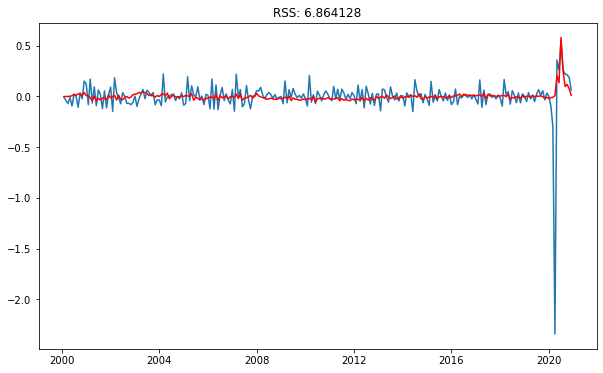

In [22]:
model = ARIMA(indexedDataset_logScale, order=(3, 1, 3))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Takeoff"])**2))
print('Plotting ARIMA model')

In [23]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2000-02-01   -0.002388
2000-03-01   -0.002237
2000-04-01   -0.001538
2000-05-01   -0.000059
2000-06-01    0.005471
dtype: float64


In [24]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2000-02-01   -0.002388
2000-03-01   -0.004625
2000-04-01   -0.006163
2000-05-01   -0.006222
2000-06-01   -0.000751
dtype: float64


In [25]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Takeoff'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
2000-01-01    9.689799
2000-02-01    9.678768
2000-03-01    9.635027
2000-04-01    9.561292
2000-05-01    9.548842
dtype: float64

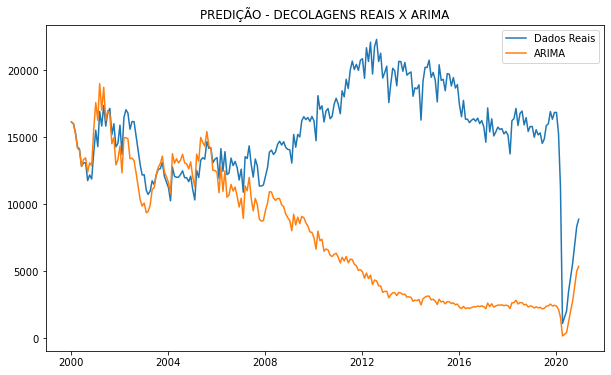

In [26]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset, label="Dados Reais")
plt.plot(predictions_ARIMA, label="ARIMA")
plt.title("PREDIÇÃO - DECOLAGENS REAIS X ARIMA")
plt.legend()

In [27]:
indexedDataset_logScale

,Takeoff
Month,
2000-01-01,9.689799
2000-02-01,9.681156
2000-03-01,9.639652
2000-04-01,9.567455
2000-05-01,9.555064
...,...
2020-08-01,8.413831
2020-09-01,8.631057
2020-10-01,8.844192


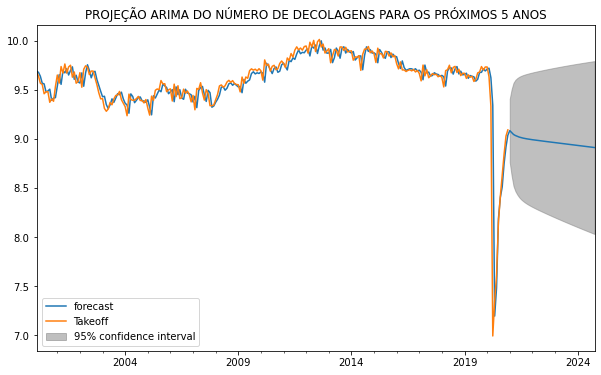

In [28]:
results_ARIMA.plot_predict(1,297)
#x=results_ARIMA.forecast(steps=120)
plt.title("PROJEÇÃO ARIMA DO NÚMERO DE DECOLAGENS PARA OS PRÓXIMOS 5 ANOS")
plt.legend()